# Predicting Music Genre from Song Lyrics


## Kalyani Tewari ; 22070126051 ; AIML A2
## Introduction

In this notebook, we aim to classify song genres based on their lyrics. We will be using the dataset available on Kaggle: [Multilingual Lyrics for Genre Classification](https://www.kaggle.com/datasets/mateibejan/multilingual-lyrics-for-genre-classification?select=train.csv).

### Objective

We will:
- Select only English songs from the following genres: Rock, Jazz, HipHop, Metal, and Country.
- Preprocess the lyrics data using Natural Language Processing (NLP) techniques such as tokenization, lemmatization, and stopword removal.
- Vectorize the lyrics using two approaches: CountVectorizer and TFIDFVectorizer.
- Build three different machine learning models: Logistic Regression, Support Vector Classifier (SVC), and Random Forest (RF).
- Compare the performance of these models using classification reports and confusion matrices.

This project will help in understanding how different vectorization techniques and machine learning algorithms perform on a text classification task.

In [2]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Data Loading and Selection

We will start by loading the dataset from Kaggle. After loading, we will select only the English-language songs that belong to the genres **Rock**, **Jazz**, **HipHop**, **Metal**, and **Country**.

These will be the genres we aim to predict from the song lyrics.

In [ ]:
df = pd.read_csv('train.csv')
df

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [ ]:
genres = ['Rock', 'Jazz', 'HipHop', 'Metal', 'Country']
df_filtered = df[(df['Language'] == 'en') & (df['Genre'].isin(genres))]
df_filtered

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290164,cherry poppin daddies,don quixote,Jazz,en,Honor was not just a word To knights of old wh...
290165,embracing,killers nature,Metal,en,I used to be blind Living inside a dream someo...
290166,avalanch,falling,Metal,en,Troubles and pains make your darkness Cries an...
290169,george strait,gone as a girl can get,Country,en,"Well I haven't seen her lately, and she never ..."


In [ ]:
df_filtered.to_csv('filtered_genres.csv', index=False)

## Filtered df

In [7]:
import pandas as pd

In [8]:
df_filtered = pd.read_csv(r'C:\Users\kalya\Downloads\filtered_genres.csv')
df_filtered

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
141477,cherry poppin daddies,don quixote,Jazz,en,Honor was not just a word To knights of old wh...
141478,embracing,killers nature,Metal,en,I used to be blind Living inside a dream someo...
141479,avalanch,falling,Metal,en,Troubles and pains make your darkness Cries an...
141480,george strait,gone as a girl can get,Country,en,"Well I haven't seen her lately, and she never ..."


## Step 2: Data Preprocessing

Before we train our models, we need to preprocess the lyrics data. We will use NLTK (or SpaCy) to perform the following preprocessing steps:

1. **Tokenization**: Breaking down the text into individual words (tokens).
2. **Lemmatization**: Reducing words to their base or root form (e.g., "running" becomes "run").
3. **Data Cleansing**:
   - Remove stopwords (common words like "the", "is", "in", etc.).
   - Remove symbols and punctuation marks.
   - Remove URLs from the lyrics.

These steps will ensure that we are working with clean and meaningful data.


In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 130.4 kB/s eta 0:01:38
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.1/12.8 MB 181.6 kB/s eta 0:01:11
     --------------------------------------- 0.1/12.8 MB 196.3 kB/s eta 0:01:05
     --------------------------------------- 0.1/12.8 MB 227.6 kB/s eta 0:00:56
     --------------------------------------- 0.1/12.8 MB 266.9 kB/s eta 0:00:48
     --------------------------------------- 0.2/12.8 MB 316.5 kB/s eta 0:00:40



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

nlp = spacy.load('en_core_web_sm')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Step 1: Lowercase the text
def preprocess_lowercase(text):
    return text.lower()

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics'].apply(preprocess_lowercase)
print("Lowercasing done.")

# Step 2: Remove URLs
def preprocess_remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_remove_urls)
print("URL removal done.")

# Step 3: Remove punctuation
def preprocess_remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_remove_punctuation)
print("Punctuation removal done.")

# Step 4: Remove numbers
def preprocess_remove_numbers(text):
    return re.sub(r'\d+', '', text)

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_remove_numbers)
print("Number removal done.")

# Step 5: Tokenization and lemmatization using SpaCy
def preprocess_tokenize_lemmatize(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.text.isalpha()]

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_tokenize_lemmatize)
print("Tokenization and lemmatization done.")

# Step 6: Remove stopwords
def preprocess_remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_remove_stopwords)
print("Stopword removal done.")

# Step 7: Handle negations
def preprocess_handle_negations(tokens):
    negations = {"not", "no", "never", "n't"}
    new_tokens = []
    skip = False
    
    for i in range(len(tokens)):
        if tokens[i] in negations and i + 1 < len(tokens):
            new_tokens.append(f"{tokens[i]}_{tokens[i+1]}")
            skip = True
        elif skip:
            skip = False
        else:
            new_tokens.append(tokens[i])
    
    return new_tokens

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_handle_negations)
print("Negation handling done.")

# Step 8: Remove extra whitespaces
def preprocess_remove_whitespace(tokens):
    processed_text = ' '.join(tokens)
    return re.sub(r'\s+', ' ', processed_text).strip()

df_filtered['Lyrics_Processed'] = df_filtered['Lyrics_Processed'].apply(preprocess_remove_whitespace)
print("Whitespace cleanup done.")


Lowercasing done.
URL removal done.
Punctuation removal done.
Number removal done.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 3.1 MB/s eta 0:13:22
     ---------------------------------------- 0.0/2.4 GB 5.9 MB/s eta 0:06:56
     ---------------------------------------- 0.0/2.4 GB 7.3 MB/s eta 0:05:34
     ---------------------------------------- 0.0/2.4 GB 8.0 MB/s eta 0:05:08
     ---------------------------------------- 0.0/2.4 GB 9.5 MB/s eta 0:04:19
     ---------------------------------------- 0.0/2.4 GB 10.4 MB/s eta 0:03:56
     ---------------------------------------- 0.0/2.4 GB 11.7 MB/s eta 0:03:29
     ---------------------------------------- 0.0/2.4 GB 11.8 MB/s eta 0:03:27
     ---------------------------------------- 0.0/2.4 GB 13.0 MB/s eta 0:03:08
     ---------------------------------------- 0.0/2.4 GB 12.2 MB/s eta 0:03:20
     ---------------------------------------- 0.0/2.4 GB 13.5 MB/s eta 0:03:01
     -

In [11]:
df_filtered

,Artist,Song,Genre,Language,Lyrics,Lyrics_Processed
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ...",start pain follow hate fuel endless question o...
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...,freedom alone alone patiently wait phone hope ...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v...",bite hand feed lie voice inside reach beg some...
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...,say know I imagine wait across line think I I ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...,heart beat fast control feeling anymore I wait...
...,...,...,...,...,...,...
141477,cherry poppin daddies,don quixote,Jazz,en,Honor was not just a word To knights of old wh...,honor word knight old pledge faith love gold l...
141478,embracing,killers nature,Metal,en,I used to be blind Living inside a dream someo...,I use blind live inside dream someone create w...
141479,avalanch,falling,Metal,en,Troubles and pains make your darkness Cries an...,trouble pain make darkness cry scream make foo...
141480,george strait,gone as a girl can get,Country,en,"Well I haven't seen her lately, and she never ...",well I see lately never_call ask friend I give...


In [12]:
df_filtered.to_csv('preprocessed_lyrics.csv', index=False)
print("Preprocessed data.")

Preprocessed data.


## Step 3: Vectorization

After preprocessing the text data, we need to convert the text into numerical features that can be used by machine learning models. We will use two different vectorization techniques:

1. **CountVectorizer**: This technique converts the text into a matrix of token counts (word frequencies).
2. **TFIDFVectorizer**: This technique transforms the text into a matrix based on Term Frequency-Inverse Document Frequency (TF-IDF), which gives more importance to less frequent but meaningful words.

Both vectorizers will be applied to the lyrics, and we will compare how well models perform with each vectorization approach.


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_processed = pd.read_csv(r'C:\Users\kalya\Downloads\preprocessed_lyrics.csv')
df_processed

,Artist,Song,Genre,Language,Lyrics,Lyrics_Processed
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ...",start pain follow hate fuel endless question o...
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...,freedom alone alone patiently wait phone hope ...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v...",bite hand feed lie voice inside reach beg some...
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...,say know I imagine wait across line think I I ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...,heart beat fast control feeling anymore I wait...
...,...,...,...,...,...,...
141477,cherry poppin daddies,don quixote,Jazz,en,Honor was not just a word To knights of old wh...,honor word knight old pledge faith love gold l...
141478,embracing,killers nature,Metal,en,I used to be blind Living inside a dream someo...,I use blind live inside dream someone create w...
141479,avalanch,falling,Metal,en,Troubles and pains make your darkness Cries an...,trouble pain make darkness cry scream make foo...
141480,george strait,gone as a girl can get,Country,en,"Well I haven't seen her lately, and she never ...",well I see lately never_call ask friend I give...


In [3]:
#vectorization
X_count = CountVectorizer().fit_transform(df_processed['Lyrics_Processed'])
X_tfidf = TfidfVectorizer().fit_transform(df_processed['Lyrics_Processed'])
y = df_processed['Genre']

## Step 4: Machine Learning Models

We will experiment with three machine learning algorithms to classify the song lyrics into their respective genres:

1. **Logistic Regression**: A linear model used for classification tasks.
2. **Support Vector Classifier (SVC)**: A classifier that finds the best boundary (hyperplane) to separate different classes.
3. **Random Forest (RF)**: An ensemble learning method that builds multiple decision trees and combines their predictions.

Each algorithm will be trained using both **CountVectorizer** and **TFIDFVectorizer** representations of the data. We will compare the results of these models using performance metrics.


## Step 5: Model Evaluation

To evaluate the performance of each model, we will use the following evaluation metrics:

1. **Classification Report**: Provides precision, recall, and F1-score for each genre class.
2. **Confusion Matrix**: Shows the true vs predicted values, helping us understand the types of errors made by the model.

In addition, we will visualize the confusion matrix using a **heatmap** to gain a better understanding of the model's predictions.


In [4]:
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf = train_test_split(X_tfidf, test_size=0.2, random_state=42)

In [11]:
# Logistic Regression
lr_count = LogisticRegression(max_iter=10000, class_weight='balanced').fit(X_train_count, y_train)

lr_tfidf = LogisticRegression(max_iter=10000, class_weight='balanced').fit(X_train_tfidf, y_train)

In [12]:
#Evaluation
models = {
    'Logistic Regression (Count)': lr_count,
    'Logistic Regression (TFIDF)': lr_tfidf,

}

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

--- Logistic Regression (Count) ---
              precision    recall  f1-score   support

     Country       0.05      0.23      0.09       359
        Jazz       0.46      0.74      0.57      2722
       Metal       0.51      0.71      0.59      3802
        Rock       0.90      0.72      0.80     21414

    accuracy                           0.71     28297
   macro avg       0.48      0.60      0.51     28297
weighted avg       0.79      0.71      0.74     28297



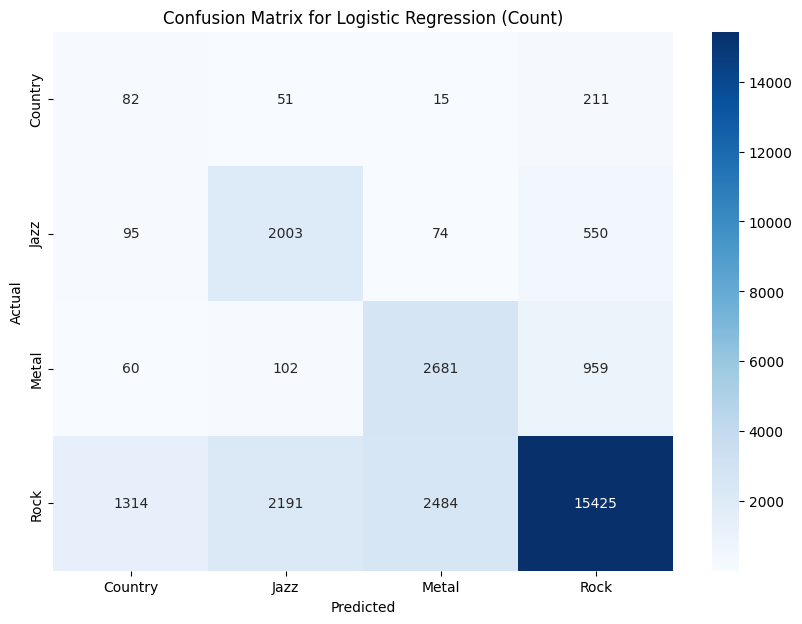

--- Logistic Regression (TFIDF) ---
              precision    recall  f1-score   support

     Country       0.06      0.41      0.10       359
        Jazz       0.44      0.74      0.55      2722
       Metal       0.46      0.77      0.58      3802
        Rock       0.91      0.63      0.74     21414

    accuracy                           0.66     28297
   macro avg       0.47      0.64      0.49     28297
weighted avg       0.79      0.66      0.69     28297



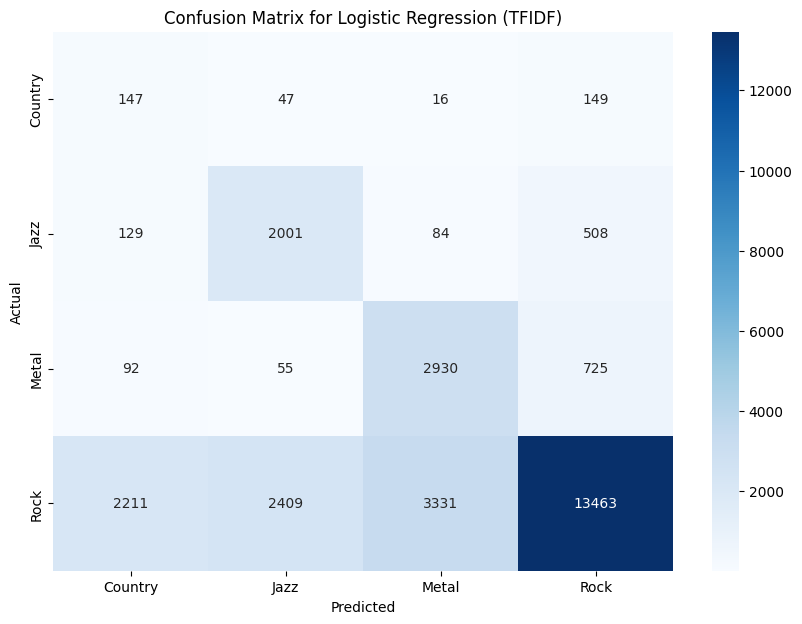

In [21]:
for model_name, model in models.items():
    if 'Count' in model_name:
        X_test = X_test_count
    else:
        X_test = X_test_tfidf

    y_pred = model.predict(X_test)

    #Classification Report
    print(f'--- {model_name} ---')
    print(classification_report(y_test, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [29]:
#SVC
svc_count = SVC().fit(X_train_count, y_train)
svc_tfidf = SVC().fit(X_train_tfidf, y_train)

In [30]:
#Evaluation
models_svc = {
    'SVC (Count)': svc_count,
    'SVC (TFIDF)': svc_tfidf,
}


--- SVC (Count) ---


c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       359
        Jazz       0.87      0.41      0.56      2722
       Metal       0.86      0.42      0.56      3802
        Rock       0.83      0.98      0.90     21414

    accuracy                           0.84     28297
   macro avg       0.64      0.45      0.51     28297
weighted avg       0.83      0.84      0.81     28297



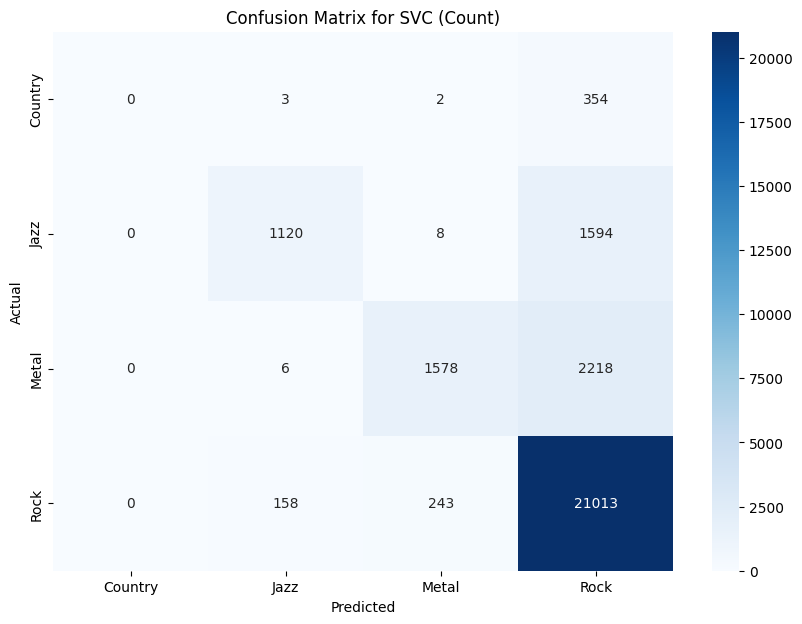

--- SVC (TFIDF) ---


c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       359
        Jazz       0.86      0.53      0.65      2722
       Metal       0.87      0.48      0.62      3802
        Rock       0.85      0.98      0.91     21414

    accuracy                           0.85     28297
   macro avg       0.65      0.50      0.55     28297
weighted avg       0.84      0.85      0.83     28297



c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


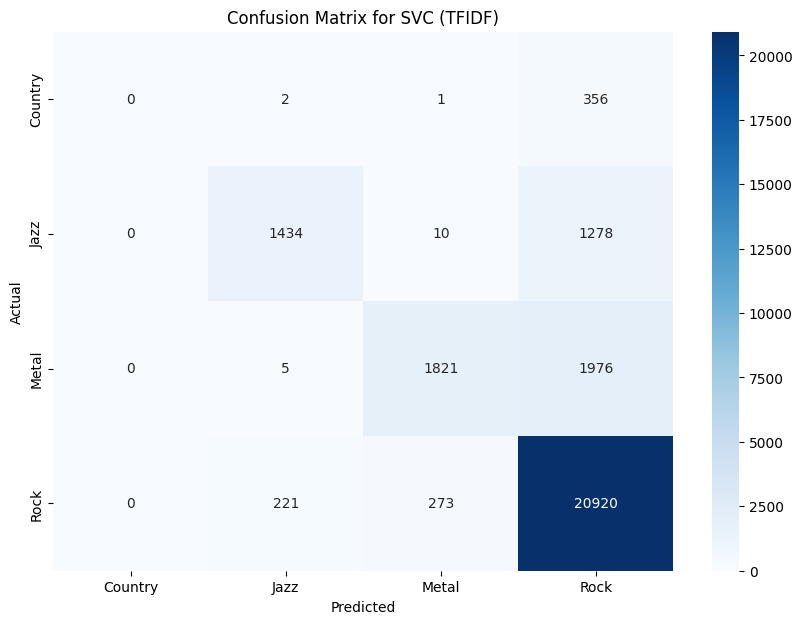

In [33]:
for model_name, model in models_svc.items():
    if 'Count' in model_name:
        X_test = X_test_count
    else:
        X_test = X_test_tfidf

    y_pred = model.predict(X_test)

    #Classification Report
    print(f'--- {model_name} ---')
    print(classification_report(y_test, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [22]:
#Random Forest
rf_count = RandomForestClassifier().fit(X_train_count, y_train)
rf_tfidf = RandomForestClassifier().fit(X_train_tfidf, y_train)

In [27]:
models_rf= {'Random Forest (Count)': rf_count,
'Random Forest (TFIDF)': rf_tfidf, }

--- Random Forest (Count) ---
              precision    recall  f1-score   support

     Country       0.02      0.00      0.00       359
        Jazz       0.84      0.56      0.67      2722
       Metal       0.94      0.31      0.46      3802
        Rock       0.83      0.98      0.90     21414

    accuracy                           0.84     28297
   macro avg       0.66      0.46      0.51     28297
weighted avg       0.84      0.84      0.81     28297



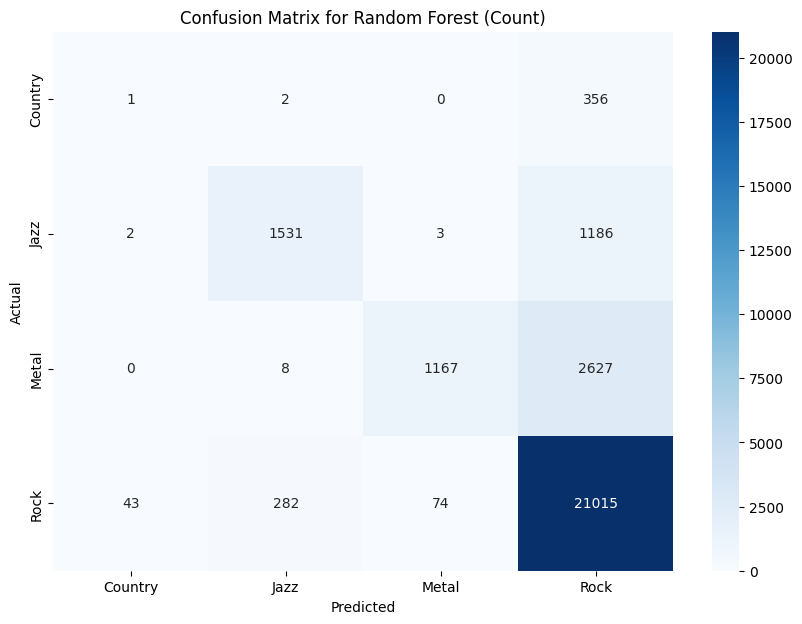

--- Random Forest (TFIDF) ---
              precision    recall  f1-score   support

     Country       0.02      0.00      0.00       359
        Jazz       0.84      0.55      0.67      2722
       Metal       0.94      0.30      0.45      3802
        Rock       0.83      0.98      0.90     21414

    accuracy                           0.84     28297
   macro avg       0.66      0.46      0.51     28297
weighted avg       0.84      0.84      0.81     28297



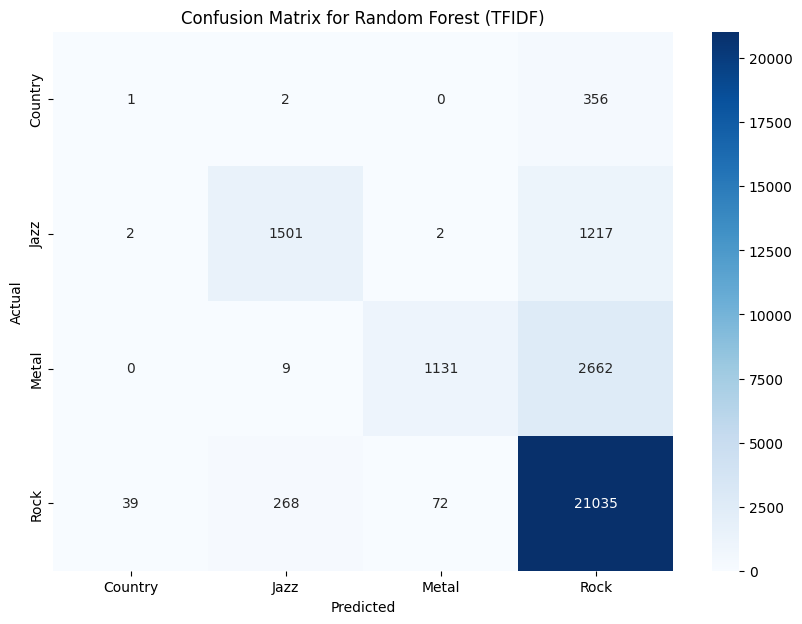

In [28]:
for model_name, model in models_rf.items():
    if 'Count' in model_name:
        X_test = X_test_count
    else:
        X_test = X_test_tfidf

    y_pred = model.predict(X_test)

    #Classification Report
    print(f'--- {model_name} ---')
    print(classification_report(y_test, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Conclusion

Based on the results obtained from various models and vectorizers, the findings are summarized below:

## 1. Logistic Regression
### - CountVectorizer:
   - The **Rock** genre performed best with a recall of **0.72** and a weighted average F1-score of **0.74**.
   - The model struggled with the **Country** genre, showing very low precision and recall.
   
### - TFIDFVectorizer:
   - **Rock** continued to perform well with a recall of **0.63**.
   - The **Country** genre remained difficult to classify with low accuracy.

## 2. Support Vector Classifier (SVC)
### - CountVectorizer:
   - **Rock** had the best performance with a recall of **0.98**.
   - **Jazz** and **Metal** performed moderately well, while **Country** had poor classification metrics.
   
### - TFIDFVectorizer:
   - **Rock** again achieved a recall of **0.98**.
   - Other genres like **Jazz** and **Metal** had moderate results, and **Country** underperformed consistently.

## 3. Random Forest
### - CountVectorizer:
   - Achieved an overall accuracy of **0.84**, with **Rock** performing best (recall of **0.98**).
   - **Jazz** and **Metal** had moderate results, while **Country** performed poorly.
   
### - TFIDFVectorizer:
   - Accuracy improved slightly to **0.85** with **Rock** maintaining the highest recall.
   - **Jazz** and **Metal** showed moderate results, and **Country** continued to underperform.

## General Observations:
- **Rock** consistently outperformed other genres across all models and vectorization methods, likely due to better representation in the dataset.
- **Country** performed the worst across all methods, with consistently low precision and recall, possibly due to fewer samples and less distinctive features.
- **TFIDFVectorizer** did not significantly outperform **CountVectorizer**, although there were slight improvements in some genres like **Jazz**.
- **SVC** with both **CountVectorizer** and **TFIDFVectorizer** yielded the best results overall, particularly for high-frequency genres like **Rock**.

### Recommendation:
- **SVC** with **TFIDFVectorizer** is recommended as the optimal model for predicting the genre of songs based on their lyrics, especially for datasets with class imbalance. Further experimentation with resampling or hyperparameter tuning could improve the performance for underperforming genres like **Country**.

In [32]:
import joblib

# Saving the models
joblib.dump(svc_count, 'svc_count_model.pkl')
joblib.dump(svc_tfidf, 'svc_tfidf_model.pkl')
joblib.dump(lr_count, 'lr_count_model.pkl')
joblib.dump(lr_tfidf, 'lr_tfidf_model.pkl')
joblib.dump(rf_count, 'rf_count_model.pkl')
joblib.dump(rf_tfidf, 'rf_tfidf_model.pkl')

print("Models saved successfully!")

Models saved successfully!
